In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text
from soccerplots.radar_chart import Radar
import highlight_text
from functools import reduce

In [174]:
# PLAYER, POSITION, SEASON and COLOR Selection ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Team_1 = 'Liverpool'
Team_2 = 'Manchester City'
Competition = 'EPL'
Color_1 = 'red'
Color_2 = 'dodgerblue'
Season = '2020 - 2021'

In [175]:
# How to Use --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1) PLAYER, POSITION, SEASON and COLOR Selection
# 2) FILTERS
# 3) METRICS
# 4) PARAMETERS

In [176]:
myfont = {'fontname':'DejaVu Sans'}

In [177]:
filenames = ['0-Standard.txt','1-Goalkeeping.txt','2-Advanced Goalkeeping.txt','3-Shooting.txt', '4-Passing.txt', '5-Pass Types.txt', '6-Goal and Shot Creation.txt', '7-Defensive Actions.txt', '8-Possession.txt', '9-Playing Time.txt', '10-Miscellaneous Stats.txt']

In [178]:
dataframe_list = [pd.read_csv(file_name) for file_name in filenames]

In [179]:
df0 = dataframe_list[0]
df1 = dataframe_list[1]
df2 = dataframe_list[2]
df3 = dataframe_list[3]
df4 = dataframe_list[4]
df5 = dataframe_list[5]
df6 = dataframe_list[6]
df7 = dataframe_list[7]
df8 = dataframe_list[8]
df9 = dataframe_list[9]
df10 = dataframe_list[10]

In [180]:
dataframes = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10] # to join 

In [181]:
df = reduce(lambda left,right: pd.merge(left,right,on=['Squad'], how='outer'), dataframes)

In [182]:
df.columns = [
#Standard    
'Team','Number of Players', 'Average Age','Possession %','Matches Played','Matches Started','Minutes Played','90s Played', 'Goals', 'Assists', 'Non-Penalty Goals','Penalties Scored', 'Penalties Attempted', 'Yellow Cards', 'Red Cards', 'Goals per 90', 'Assists per 90', 'Goal Contributions per 90', 'Non-Penalty Goals per 90', 'Non-Penalty Goal Contributions per 90', 'xG', 'Non-Penalty xG', 'xA', 'Non-Penalty Expected Goal Contributions', 'xG per 90', 'xA per 90', 'Expected Goal Contributions per 90', 'Non-Penalty xG per 90', 'Non-Penalty Expected Goal Contributions per 90',
#Goalkeeping
'Number of Players','Matches Played', 'Matches Started', 'Minutes Played', '90s Played', 'Goals Conceded', 'Goals Conceded per 90', 'Shots on Target Against', 'GK Saves', 'GK Save %', 'Wins', 'Draws', 'Losses', 'Clean Sheets', 'Clean Sheet %', 'Penalties Faced', 'Penalties Conceded', 'Penalties Saved', 'Penalties Against Off Target', 'GK Penalty Save %',
#Advanced Goalkeeping
'Number of Players','90s Played', 'Goals Conceded', 'Penalties Conceded', 'Free Kicks Conceded', 'Corner Kicks Conceded', 'Own Goals Conceded', 'Post-Shot xG Against', 'Post-Shot xG Against per Shot on Target', 'Post-Shot xG Against PlusMinus', 'Post-Shot xG Against PlusMinus per 90', 'GK Long Passes Completed', 'GK Long Passes Attempted', 'GK Long Pass Completion %','GK Passes Attempted', 'GK Throws Attempted', 'GK Long Pass Preference %', 'GK Average Pass Length (Yd)', 'GK Goal Kicks Attempted', 'GK Long Goal Kick Preference %', 'GK Average Goal Kick Length (Yd)', 'GK Crosses Faced', 'GK Crosses Stopped', 'GK Cross Stoppage %', 'GK Sweeping Actions', 'GK Sweeping Actions per 90', 'GK Average Sweeping Action Distance From Goal (Yd)',
#Shooting
'Number of Players','90s Played', 'Goals', 'Shots', 'Shots on Target', 'Shot Accuracy %', 'Shots per 90', 'Shots on Target per 90', 'Goals per Shot', 'Goals per Shots on Target', 'Average Shot Distance From Goal (Yd)', 'Direct Free Kicks Attempted', 'Penalties Scored', 'Penalties Attempted', 'xG', 'Non-Penalty xG', 'Non-Penalty xG per Shot', 'Goals - xG','Non-Penalty Goals - Non-Penalty xG',
#Passing
'Number of Players','90s Played', 'Passes Completed', 'Passes Attempted','Pass Completion %', 'Total Pass Distance (Yd)', 'Progressive Pass Distance (Yd)', 'Short Passes Completed', 'Short Passes Attempted','Short Pass Completion %','Medium Passes Completed', 'Medium Passes Attempted', 'Medium Pass Completion %', 'Long Passes Completed', 'Long Passes Attempted', 'Long Pass Completion %', 'Assists', 'xA', 'Assists - xA', 'Key Passes','Successful Passes into Final Third', 'Passes Completed into Opposition Box', 'Crosses Completed into Opposition Box', 'Progressive Passes',

#Pass Types
'Number of Players','90s Played', 'Passes Attempted', ' Live-Ball Passes', 'Dead-Ball Passes', 'Passes From Free Kicks', 'Through Balls Completed', 'Passes Completed Under Pressure', 'Flank Changes', 'Crosses Attempted', 'Corner Kicks Taken', 'In-Swinging Corner Kicks', 'Out-Swinging Corner Kicks', 'Straight Corner Kicks', 'Ground Passes','Low Passes','Lofted Passes','Left Footed Passes Attempted','Right Footed Passes Attempted','Headed Passes Attempted', 'Throw-Ins Taken','Other Body Part Passes Attempted','Passes Completed', 'Passes Leading to Offside', 'Passes Out of Bounds','Passes Intercepted by Opposition','Passes Blocked by Opposition',

#Goal and Shot Creation
'Number of Players','90s Played','Shot Creating Actions','Shot Creating Actions per 90','Shot Creating Live-Ball Passes','Shot Creating Dead-Ball Passes','Shot Creating Dribbles', 'Shot Creating Shots', 'Shot Creating Fouls Won', 'Shot Creating Defensive Actions','Goal Creating Actions', 'Goal Creating Actions per 90', 'Goal Creating Live-Ball Passes','Goal Creating Dead-Ball Passes','Goal Creating Dribbles', 'Goal Creating Shots', 'Goal Creating Fouls Won', 'Goal Creating Defensive Actions', 'Own Goal Creating Actions', 

#Defensive Actions
'Number of Players','90s Played','Tackles Won','Ball-Winning Tackles','Tackles Won in the Defensive Third','Tackles Won in the Middle Third','Tackles Won in the Final Third','Tackles Won Against Dribblers','Tackles Attempted Against Dribblers','Tackles Won Against Dribblers %', 'Dribbled Past','Pressures','Successful Pressures','Pressure Success %', 'Pressures in the Defensive Third','Pressures in the Middle Third','Pressures in the Final Third','Blocks','Blocked Shots','Blocked Shots on Target','Blocked Passes','Interceptions','Tackles + Interceptions','Clearances','Mistakes Leading to Shot',

# Total Tackles Attempted = 'Tackles Won' + 'Dribbled Past'

#Possession
'Number of Players','Possession %','90s Played','Touches','Touches In Own Box','Touches in the Defensive Third','Touches in the Middle Third','Touches in the Final Third', 'Touches In Opposition Box','Live-Ball Touches','Dribbles Completed','Dribbles Attempted','Dribble Completion %','Take-Ons','Nutmegs','Carries','Total Carry Distance (Yd)','Progressive Carry Distance (Yd)','Progressive Carries','Carries into the Final Third','Carries into Opposition Box','Unsuccessful Touches','Dispossessed','Passes Targeted','Passes Received','Pass Reception %','Progressive Passes Received',

#Playing Time
'Number of Players', 'Average Age','Matches Played','Minutes Played', 'Minutes per Match','Percentage of Minutes Played %', '90s Played', 'Matches Started','Minutes per Matches Started','Complete Matches Played','Times Subbed On', 'Minutes per Sub','Times as Unused Sub','Points Per Match','Team Goals Scored','Team Goals Conceded','Team Goals PlusMinus','Team Goals PlusMinus per 90','Team xG','Team xGA', 'Team xG PlusMinus','Team xG PlusMinus per 90',

#Miscellaneous Stats
'Number of Players','90s Played','Yellow Cards','Red Cards','2nd Yellow Cards','Fouls Committed','Fouls Won','Offsides','Crosses Attempted','Interceptions','Tackles Won','Penalties Won','Penalties Given Away','Own Goals','Recoveries','Aerials Won','Aerials Lost', 'Aerial Win %']

In [183]:
df = df.loc[:, ~df.columns.duplicated()]

In [184]:
df['Tackles Attempted'] = df['Tackles Won'] + df['Dribbled Past']
df['Tackle Success %'] = 100 * df['Tackles Won'] / df['Tackles Attempted']
df['Turnovers'] = df['Unsuccessful Touches'] + df['Dispossessed'] - df['Dribbles Completed'] + df['Dribbles Attempted']
df['Shots per Touch'] = df['Shots'] / df['Touches']
df['Share of Touches in the Final Third %'] = 100 * df['Touches in the Final Third'] / (df['Touches in the Defensive Third'] + df['Touches in the Middle Third'] + df['Touches in the Final Third'])
df['Deep Progressions'] = df['Successful Passes into Final Third'] + df['Carries into the Final Third'] +  0.01*(df['Share of Touches in the Final Third %'] * df['Dribbles Completed'])
df['Points'] = 3 * df['Wins'] + df['Draws']
df['Season'] = '2020-2021'
df['Team_ID'] = df['Team'].astype(str) + '_' + df['Season'].astype(str)

Average = {"Team": f"{Competition} Average {Season}","Season":f"{Season}","Team_ID":f"{Competition}_Average_{Season}"}
Average = pd.Series(Average)
Column_Averages = df.mean(axis=0)
Average =  Average.append(Column_Averages)
Average = pd.Series.transpose(Average)
df = df.append(Average, ignore_index=True)

df.to_excel(f"{Competition} Team Stats {Season}.xlsx")

In [185]:
# METRICS Select 6 and exclude TEAM ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Defending
#metrics = ['Goals Conceded','Shots on Target Against', 'Post-Shot xG Against','Tackles Won','Tackles Won in the Defensive Third','Interceptions']
#metrics = ['Clearances', 'Aerials Won', 'GK Saves', 'Corner Kicks Conceded', 'GK Sweeping Actions', 'Points']

# Transition
#metrics = df['Progressive Passes','Progressive Carries', 'Through Balls Completed','Pressures','Pressures in the Middle Third','Pressures in the Final Third']
#metrics = df['Tackles Won in the Middle Third', 'Tackles Won in the Final Third', 'Dribbles Completed', 'Fouls Won', 'Fouls Committed', 'Points']

# Attacking
metrics = ['Goals','Goals - xG', 'Shots','Shots on Target','Shot Creating Actions','Goal Creating Actions']
#metrics = ['Shots per Touch', 'Touches In Opposition Box', 'Share of Touches in the Final Third %', 'Dribbles Completed', 'Deep Progressions', 'Points']

# Passing and Possession

#metrics = ['Assists','Assists - xA', 'Possession %','Passes Completed','Pass Completion %','Successful Passes into Final Third']
#metrics = ['Passes Completed into Opposition Box','Crosses Completed into Opposition Box', 'Touches', 'Turnovers', 'GK Long Goal Kick Preference %', 'Points']


Text(0.788, 0.03, '@msuatgunerli data via FBref')

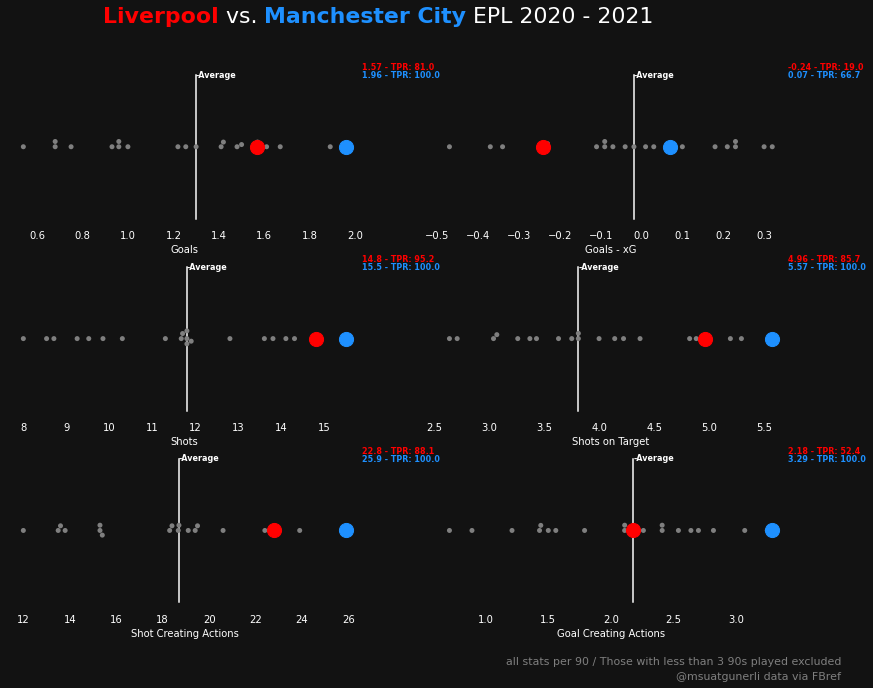

In [186]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor('#121212')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

counter=0
counter2=0 
met_counter = 0

for i,ax in zip(df['Team'],axes.flatten()):
    ax.set_facecolor('#121212')
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    ax.tick_params(axis=u'both', which=u'both',length=0)

    #Graph 1
    #ax = df[metrics[met_counter]].plot.kde(ax=axes[counter,counter2], zorder=2,color='white')
    #l1 = ax.lines[0]
    #x1 = l1.get_xydata()[:,0]
    #y1 = l1.get_xydata()[:,1]
    #ax.fill_between(x1,y1, color="#7F7F7F", alpha=0.3)

    #Graph 2
    sns.swarmplot(x=metrics[met_counter],data=df,ax=axes[counter,counter2],zorder=2,color='#7F7F7F')
    
    #Graph 3
    #sns.violinplot(x=metrics[met_counter],data=df,ax=axes[counter,counter2],inner = None, zorder=2,color='#7F7F7F')


    per_50 = np.percentile(df[metrics[met_counter]],50)
    ax.axvline(x=per_50,ymin=0.05, ymax=0.95,color='white',zorder=1, linewidth=1.5, ls='-', alpha = 1)
    ax.text(s='-Average',x=per_50,y=-0.43675,c='white',weight='bold', size=8, alpha = 1)

    ax.set_xlabel(f'{metrics[met_counter]}',c='white')

    for x in range(len(df['Team'])):
        if df['Team'][x] == Team_1:
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c=Color_1,zorder=3)
            #ax.text(s= str(Player_1),x=df[metrics[met_counter]][x],y=-.08,c=Color_1,size=8)
            
            per_team1 = sp.stats.percentileofscore(df[metrics[met_counter]],df[metrics[met_counter]][x])
            text(1, 1, str(round(df[metrics[met_counter]][x],2)) + ' - TPR: '+ str(round(per_team1,1)), ha='left', va='center', color=Color_1, transform=ax.transAxes, weight='bold', size=8)

        if df['Team'][x] == Team_2:
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c=Color_2,zorder=3)
            #ax.text(s= str(Player_2), x=df[metrics[met_counter]][x],y=-.08,c=Color_2,size=8)

            per_team2 = sp.stats.percentileofscore(df[metrics[met_counter]],df[metrics[met_counter]][x])
            text(1, 0.95, str(round(df[metrics[met_counter]][x],2))+ ' - TPR: '+ str(round(per_team2,1)), ha='left', va='center', color=Color_2, transform=ax.transAxes, weight='bold', size=8)

    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue #break out of the current iteration and go to the top, yoksa bire set edip tekrar sıfıra dönecekti
    if counter2 == 1:
        counter2 = 0
        counter+=1

s = f"<{Team_1}> vs. <{Team_2}> {Competition} {Season}"
highlight_text.fig_text(s=s,
                x=.22, y=0.95,
                highlight_weights = ['bold'],
                **myfont,
                fontsize=22,
                #fontfamily = 'Andale Mono',
                color = 'white',
                highlight_colors = [Color_1, Color_2], #oyuncu adı rengi buraya
                va='center',
                zorder=3
               )

fig.text(.62,.05,"all stats per 90 / Those with less than 3 90s played excluded",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')
fig.text(.788,.03,"@msuatgunerli data via FBref",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')

#plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [187]:
# PARAMETERS - Select 12 and include TEAM ----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Defending
df = df[['Team','Goals Conceded','Shots on Target Against', 'Post-Shot xG Against','Tackles Won','Tackles Won in the Defensive Third','Interceptions','Clearances', 'Aerials Won', 'GK Saves', 'Corner Kicks Conceded', 'GK Sweeping Actions']]
df.columns = ['Team','Goals Conceded','SoT Against', 'PSxG Against','Tackles Won','Tackles Won Def Third','Interceptions','Clearances', 'Aerials Won', 'GK Saves', 'Corners Conceded', 'GK Sweeping Actions']

# Transition
#df = df[['Team','Progressive Passes','Progressive Carries', 'Through Balls Completed','Pressures','Pressures in the Middle Third','Pressures in the Final Third','Tackles Won in the Middle Third', 'Tackles Won in the Final Third', 'Dribbles Completed', 'Fouls Won', 'Fouls Committed']]
#df.columns = ['Team','Prog Passes','Prog Carries', 'Through Balls Cmp','Pressures','Pressures Mid Third','Pressures Final Third','Tackles Won Mid Third', 'Tackles Won Final Third', 'Dribbles Completed', 'Fouls Won', 'Fouls Committed']

# Attacking
#df = df[['Team','Goals','Goals - xG', 'Shots','Shots on Target','Shot Creating Actions','Goal Creating Actions','Shots per Touch', 'Touches In Opposition Box', 'Share of Touches in the Final Third %', 'Dribbles Completed', 'Deep Progressions']]
#df.columns = ['Team','Goals','Goals - xG', 'Shots','SoT','SCA','GCA','Shots per Touch', 'Touches Opp Box', 'Touches Final Third %', 'Dribbles Completed', 'Deep Progressions']

# Passing and Possession

#df = df[['Team','Assists','Assists - xA', 'Possession %','Passes Completed','Pass Completion %','Successful Passes into Final Third','Passes Completed into Opposition Box','Crosses Completed into Opposition Box', 'Touches', 'Turnovers', 'GK Long Goal Kick Preference %']]
#df.columns = ['Team','Assists','Assists - xA', 'Possession %','Passes Cmp','Pass Completion %','Passes Cmp into \n Final Third','Passes Cmp into \n Opp Box','Crosses Cmp into \n Opp Box', 'Touches', 'Turnovers', 'Long GK Pref %']


In [188]:
dfcomp = df

In [189]:
df = df[(df['Team']==Team_1) | (df['Team']==Team_2)].reset_index(drop=True)
df

,Team,Goals Conceded,SoT Against,PSxG Against,Tackles Won,Tackles Won Def Third,Interceptions,Clearances,Aerials Won,GK Saves,Corners Conceded,GK Sweeping Actions
0,Liverpool,1.29,3.54,1.35,14.0,5.43,7.79,16.8,14.1,2.36,0.18,1.29
1,Manchester City,0.68,2.04,0.76,14.8,6.00,7.82,14.0,13.9,1.57,0.07,0.71


In [190]:
params = list(df.columns)
params = params[1:]

In [191]:
per_25 = []
per_50 = []
per_75 = []
TPR_1 = []
TPR_2 = []
labels = []
per_team1 = []
per_team2 = []
    
for i in range(len(params)):
   
    per_25v = np.percentile(dfcomp[params[i]],25)
    per_25.append(per_25v)

    per_50v = np.percentile(dfcomp[params[i]],50)
    per_50.append(per_50v)

    per_75v = np.percentile(dfcomp[params[i]],75)
    per_75.append(per_75v)

    label = f'{params[i]}'
    labels.append(label)

    for x in range(len(df['Team'])):
        if df['Team'][x] == Team_1:
            per_team1.append(sp.stats.percentileofscore(dfcomp[params[i]],dfcomp[params[i]][x]))

        if df['Team'][x] == Team_2:
            per_team2.append(sp.stats.percentileofscore(dfcomp[params[i]],dfcomp[params[i]][x]))

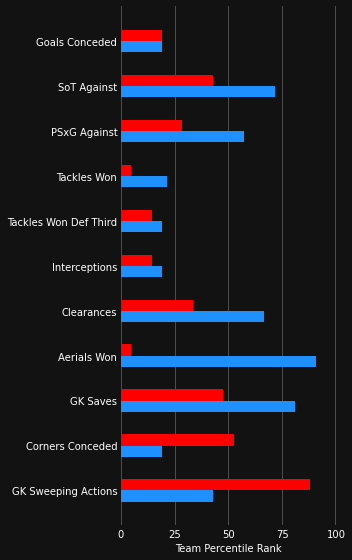

In [192]:
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(5,7.89))

fig.set_facecolor('#121212')
ax.set_facecolor('#121212')

spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

y = labels
y_pos = np.arange(len(labels))
width = 0.25

plt.axvline(0,linewidth=2, color='white', alpha = 0.25, zorder = 1)
plt.axvline(25,linewidth=1, color='white', alpha = 0.25, zorder = 1)
plt.axvline(50,linewidth=1, color='white', alpha = 0.25, zorder = 1)
plt.axvline(75,linewidth=1, color='white', alpha = 0.25, zorder = 1)
plt.axvline(100,linewidth=2, color='white', alpha = 0.25, zorder = 1)

rects1 = ax.barh(y_pos - width/2, per_team1, width, color = Color_1, alpha = 1, zorder = 2)
rects2 = ax.barh(y_pos + width/2, per_team2, width, color = Color_2, alpha = 1, zorder = 2)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.xlim([0, 100])
plt.xticks([0,25,50,75,100])
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, size = 10)
ax.invert_yaxis()
ax.set_xlabel('Team Percentile Rank', size = 10, color = 'white')

fig.tight_layout()

plt.show()

In [193]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.10)
    
    ranges.append((a,b))
    
for x in range(len(df['Team'])):
    if df['Team'][x] == Team_1:
        a_values = df.iloc[x].values.tolist()
    if df['Team'][x] == Team_2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [194]:
title = dict(
    title_name= Team_1,
    title_color = Color_1,
    subtitle_name = str(Competition) + ' ' + str(Season),
    subtitle_color = Color_1,
    title_name_2= Team_2,
    title_color_2 = Color_2,
    subtitle_name_2 = str(Competition) + ' ' + str(Season),
    subtitle_color_2 = Color_2,
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@msuatgunerli - all stats per90, data via FBref'

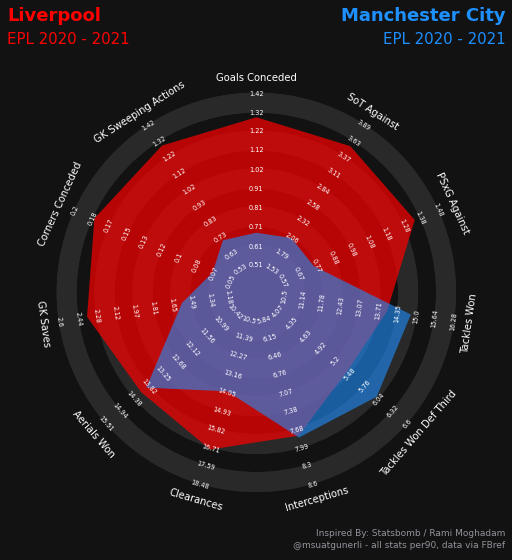

In [195]:
radar = Radar(background_color="#121212", patch_color="#292929", label_color="#FFFFFF", range_color="#FFFFFF")

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=[Color_1,Color_2],
                         alphas=[0.7,0.6],title=title,endnote=endnote,
                         compare=True)